# ZOO Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [2]:
zoo=pd.read_csv("Zoo.csv")

## EDA

In [3]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [5]:
zoo.drop(columns=["animal name"],inplace=True)

In [6]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
zoo=pd.get_dummies(zoo,columns=["legs"],drop_first=True)

In [8]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,type,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,4,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,1,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,6,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,7,0,0,0,0,0


In [9]:
y=zoo["type"]
x=zoo.drop(columns=["type"])

## Model Building

In [10]:
model = KNeighborsClassifier(n_neighbors = 14)

In [11]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=14)

In [12]:
kfold = KFold(n_splits = 10)
results = cross_val_score(model, x, y, cv = kfold)

In [13]:
results

array([1. , 0.9, 0.7, 1. , 1. , 0.9, 0.9, 0.7, 0.7, 0.8])

In [14]:
results.mean()

0.86

### Grid Search for Algorithm Tuning


In [15]:
n_neighbors = list(range(1,41)) # [1,2,4,...,40]
parameters = {'n_neighbors' : n_neighbors}

In [16]:
model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x, y)

C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}


### Visualizing the CV results


In [18]:
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only

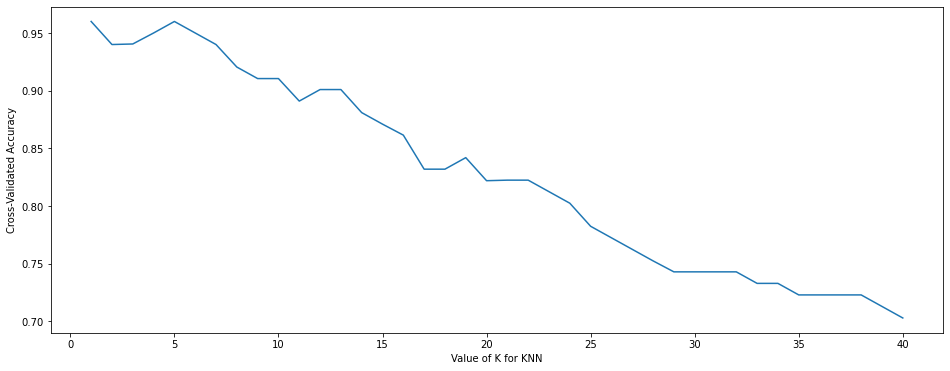

In [19]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()

## Glass Data

In [20]:
glass=pd.read_csv("glass.csv")

In [21]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [22]:
x=glass.drop(columns=["Type"])
y=glass["Type"]

In [23]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


## Model Building

In [24]:
model = KNeighborsClassifier(n_neighbors = 14)

In [25]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=14)

In [26]:
kfold = KFold(n_splits = 10)
results = cross_val_score(model, x, y, cv = kfold)

In [27]:
results

array([0.5       , 0.86363636, 0.77272727, 0.90909091, 0.19047619,
       0.47619048, 0.47619048, 0.        , 0.14285714, 0.04761905])

In [28]:
results.mean()

0.43787878787878787

## Grid Search for Algorithm Tuning

In [29]:
n_neighbors = list(range(1,41)) # [1,2,4,...,40]
parameters = {'n_neighbors' : n_neighbors}

In [30]:
model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


## Visualizing the CV results

In [32]:
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

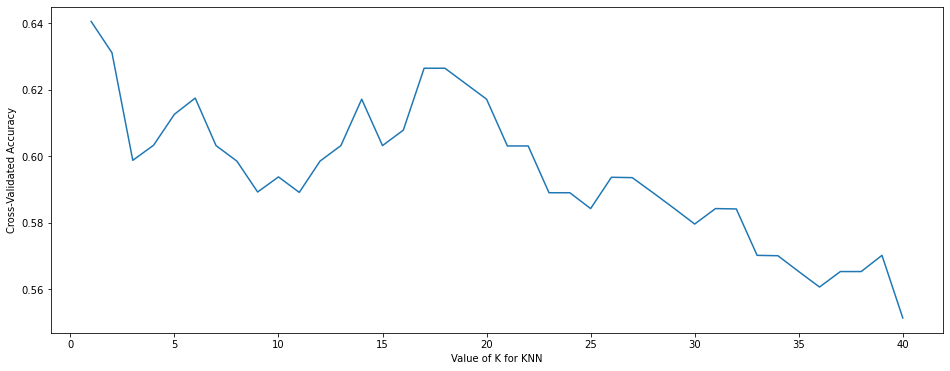

In [33]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()